<a href="https://colab.research.google.com/github/fralfaro/MAT281_2022/blob/main/labs/lab_05/lab_05.ipynb
" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°05



## Problema 01
<img src="https://storage.googleapis.com/kaggle-datasets-images/19/19/default-backgrounds/dataset-card.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [4]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [5]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_05/data/iris_contaminados.csv")
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head(15) 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica
5,6.7,3.1,5.6,2.4,virginica
6,5.8,2.8,5.1,2.4,virginica
7,6.2,3.4,5.4,2.3,virginica
8,6.7,3.0,5.2,2.3,virginica
9,6.8,3.2,5.9,2.3,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [6]:
df['species'].unique()

array(['setosa', ' virginica', 'VIRGINICA', 'virginica', 'virginica ',
       'versicolor', 'Versicolor', 'VERSICOLOR', nan, 'Setosa', 'SETOSA'],
      dtype=object)

In [7]:
#correccion 
df.loc[df["species"]==" virginica","species"]="virginica"
df.loc[df["species"]=="virginica ","species"]="virginica"
df.loc[df["species"]=="Setosa","species"]="setosa"
df.loc[df["species"]=="SETOSA","species"]="setosa"
df.loc[df["species"]=="Versicolor","species"]="versicolor"
df.loc[df["species"]=="VIRGINICA","species"]="virginica"
df.loc[df["species"]=="VERSICOLOR","species"]="versicolor"
df.loc[df["species"].isnull(),"species"]="default" #corregir el valor nan


In [8]:
conteo=len(df['species'].unique())

In [9]:
conteo

4

2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

In [10]:
#reemplazar los valores nan

df.loc[df["sepalLength"].isnull(),"sepalLength"]=0
df.loc[df["sepalWidth"].isnull(),"sepalWidth"]=0
df.loc[df["petalLength"].isnull(),"petalLength"]=0
df.loc[df["petalWidth"].isnull(),"petalWidth"]=0

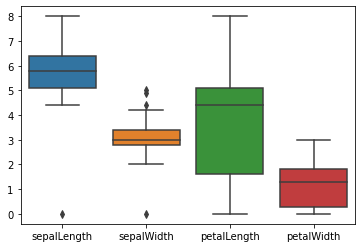

In [11]:
#grafico
stats_df = df.drop(['species'], axis=1)
sns.boxplot(data=stats_df)

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [12]:
mask_sl_inf =  df['sepalLength']>=4.0
mask_sl_sup =  df['sepalLength']<=7.0

mask_sw_inf =  df['sepalWidth']>=2
mask_sw_sup =  df['sepalWidth']<=4.5

mask_pl_inf =  df['petalLength']>=1.0
mask_pl_sup =  df['petalLength']<=7.0

mask_pw_inf =  df['petalWidth']>=0.1
mask_pw_sup =  df['petalWidth']<=2.5


mask_sl = mask_sl_inf & mask_sl_sup
mask_sw = mask_sw_inf & mask_sw_sup
mask_pl = mask_pl_inf & mask_pl_sup
mask_pw = mask_pw_inf & mask_pw_sup

df["label"]= mask_sl & mask_sw & mask_pl & mask_pw
df

,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,4.4,3.2,1.3,3.0,setosa,False
1,7.2,3.6,6.1,2.5,virginica,False
2,6.3,3.3,6.0,2.5,virginica,True
3,6.7,3.3,5.7,2.5,virginica,True
4,6.3,3.4,5.6,2.4,virginica,True
...,...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,setosa,True
146,4.8,3.0,1.4,0.1,setosa,True
147,4.9,3.1,1.5,0.1,setosa,True
148,4.9,3.6,1.4,0.1,setosa,True


4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

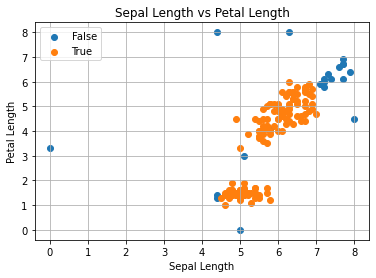

In [13]:
# sepalLength vs petalLength
fig,ax =plt.subplots()
for label in df["label"].unique():
  x=df.loc[df["label"]==label,"sepalLength"]
  y=df.loc[df["label"]==label,"petalLength"]
  ax.scatter(x,y,label=label)

ax.legend()
ax.grid(True)

plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.title("Sepal Length vs Petal Length")
plt.show()



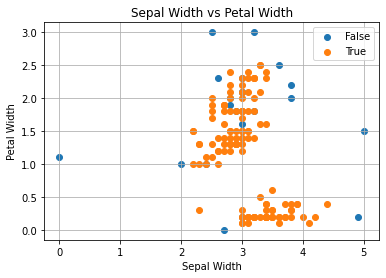

In [14]:
# sepalWidth vs petalWidth

fig, ax = plt.subplots()

for label in df["label"].unique():
    x= df.loc[df["label"]==label, "sepalWidth"]
    y= df.loc[df["label"]==label, "petalWidth"]
    ax.scatter(x, y, label=label)

ax.legend()
ax.grid(True)

plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.title("Sepal Width vs Petal Width")
plt.show()

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

Text(0, 0.5, 'Petal Length')

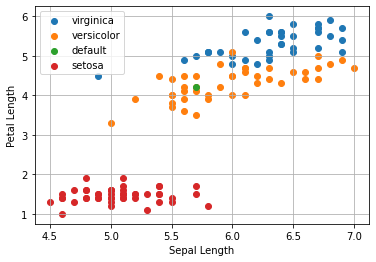

In [16]:
df_aux = df.loc[df['label']==True]
fig,ax = plt.subplots()
for specie in df_aux['species'].unique():
    x_axis = df_aux.loc[df_aux['species']==specie, 'sepalLength']
    y_axis = df_aux.loc[df_aux['species']==specie, 'petalLength']
    ax.scatter(x_axis,y_axis,label=specie)

ax.legend()
ax.grid(True)

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')